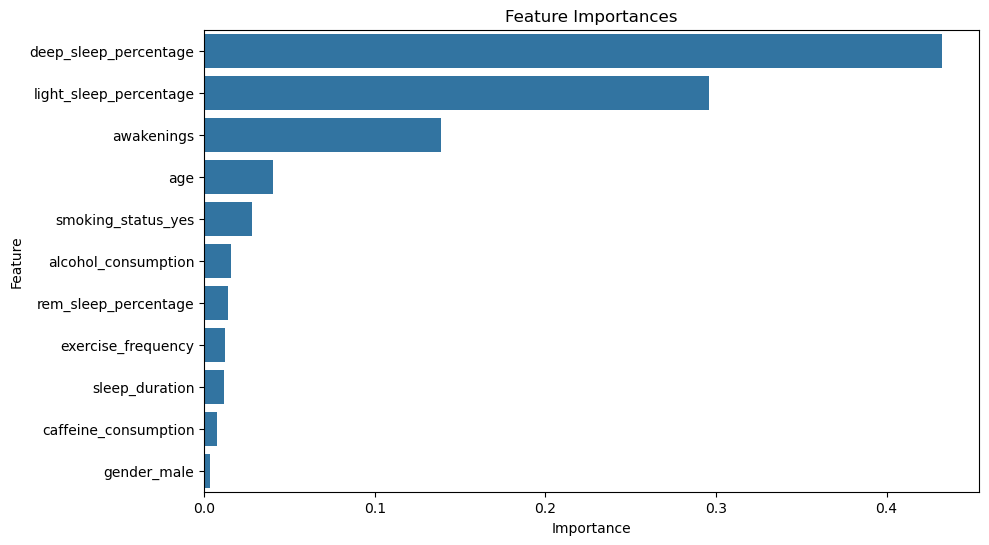

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data
data = pd.read_csv('data/Sleep_Efficiency.csv')

# Rename all columns to lower case and replace spaces with underscores
data.columns = data.columns.str.lower().str.replace(' ', '_')

# Drop "id", "wakeup_time", "bedtime"
data = data.drop(columns=["id", "wakeup_time", "bedtime"])


# Hot encoding for "Gender", "Smoking Status"
data = pd.get_dummies(data, columns=["gender", "smoking_status"], drop_first=True)
data.columns = data.columns.str.lower().str.replace(' ', '_')

# Data cleaning fill the missing values with the mean of the column
data = data.fillna(data.mean())

# Define the features (X) and target (y)
X = data.drop(columns=['sleep_efficiency'])
y = data['sleep_efficiency']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


# Analyze the effect of caffeine_consumption
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [39]:
mean_absolute_error(y_pred=y_pred, y_true=y_test)

0.038494117647058845

In [40]:
mean_squared_error(y_pred=y_pred, y_true=y_test)

0.002655482500000005

In [41]:
r2_score(y_pred=y_pred, y_true=y_test)

0.8693878673514104

## Using GridSearchCV to Improve Model Performance

In [42]:

# Tune the hyperparameters for better model
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

model_cv = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
model_cv.fit(X_train, y_train)

print('Best parameters:', model_cv.best_params_, '\nBest score:', model_cv.best_score_)


Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50} 
Best score: -0.0026956158142805915


In [43]:
y_pred = model_cv.predict(X_test)
mean_absolute_error(y_pred=y_pred, y_true=y_test)

0.04087093753864838

In [44]:
mean_squared_error(y_pred=y_pred, y_true=y_test)

0.0025994559387609363

Here you can see that the R2_Score got better

In [45]:
r2_score(y_pred=y_pred, y_true=y_test)

0.8721435807286975

# Features importances

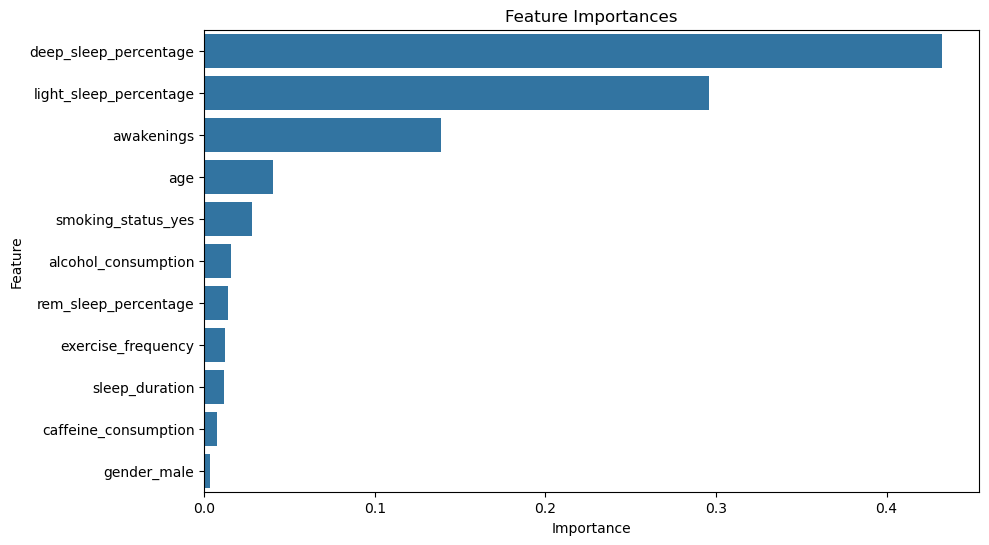

In [47]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()